In [2]:
!pip install plotly
import pandas as pd
import seaborn as sns
import plotly as py
import matplotlib.pyplot  as plt
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import chart_studio.plotly as py
import numpy as np
import statsmodels.formula.api as smf
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [6]:
#df_all = pd.read_csv('https://bsa-correlation-one.s3.amazonaws.com/timeseries644.csv')
df_all = pd.read_csv('../data/timeseries644.csv', dtype={'product_gtin':'str'})

In [10]:
df_all['product_gtin'].unique()

array([ 7909389107160,  7909389695100,  7909463793142,  7898164712364,
        2960000518630,  7897889805825,  7433102914129,  7898576443573,
        7898943954053,  7894171113064,  7908166707234,  7899951401355,
        7892049060281,  7894663504974,  7908128617380,  7898583353186,
        7908157707601,  4015110001362,  3605975050882,  7898571143300,
        7898605383559,  1001001118649,  7896873117425,  7892311109465,
        7892331000148,  5601989993199,  7898513878284,  7898066740533,
        7898508269387,  7909389270130,  7898466608648,  7898908616255,
        7908013300601,  6012533474450,  7891356074660,  7895589451762,
        7898326240131,  7890002200026,  7898412081952,  7899459304660,
        7896873142472,  7896498360176,  7899091402847,  2960000403806,
        5214214000007,  7896311710874,  7909463040086,  7897372153495,
        7909389054860,  2960000077229,  7896637661546,  7894945622129,
        7897375164269,  7898507470104,  7899806929522,  7896558411602,
      

In [11]:
df = df_all[df_all['product_gtin'] == 7908243600137]
df.head()

,date,product_gtin,competition_price,price,freight_value,commission_product_olist,commission_freight_olist,orders,product_type,product_type_group,...,stock_min,stock_avg,price_max,price_min,price_avg,offer_max,offer_min,offer_avg,name,description
47890,2019-03-15,7908243600137,217.8,199.8,NaN,NaN,NaN,0.0,Kit para cabelo,beleza_saude,...,22.0,22.0,217.8,217.8,217.8,199.8,199.8,199.8,Kit Wella Invigo Nutri Enrich Shampoo 1L + Más...,Kit Wella Invigo Nutri Enrich Shampoo 1000ml +...
47891,2019-03-16,7908243600137,217.8,199.8,NaN,NaN,NaN,0.0,Kit para cabelo,beleza_saude,...,22.0,22.0,217.8,217.8,217.8,199.8,199.8,199.8,Kit Wella Invigo Nutri Enrich Shampoo 1L + Más...,Kit Wella Invigo Nutri Enrich Shampoo 1000ml +...
47892,2019-03-17,7908243600137,217.8,199.8,NaN,NaN,NaN,0.0,Kit para cabelo,beleza_saude,...,22.0,22.0,217.8,217.8,217.8,199.8,199.8,199.8,Kit Wella Invigo Nutri Enrich Shampoo 1L + Más...,Kit Wella Invigo Nutri Enrich Shampoo 1000ml +...
47893,2019-03-18,7908243600137,217.8,199.8,NaN,NaN,NaN,0.0,Kit para cabelo,beleza_saude,...,22.0,22.0,217.8,217.8,217.8,199.8,199.8,199.8,Kit Wella Invigo Nutri Enrich Shampoo 1L + Más...,Kit Wella Invigo Nutri Enrich Shampoo 1000ml +...
47894,2019-03-19,7908243600137,217.8,199.8,NaN,NaN,NaN,0.0,Kit para cabelo,beleza_saude,...,22.0,22.0,217.8,217.8,217.8,199.8,199.8,199.8,Kit Wella Invigo Nutri Enrich Shampoo 1L + Más...,Kit Wella Invigo Nutri Enrich Shampoo 1000ml +...


In [12]:
# nao ta funcionando. nao sei pq.
trace0 = go.Scatter(x=df.date,
                   y=df.orders, mode='lines', name='orders')

trace1 = go.Scatter(x=df.date,
                    y=df.competition_price, mode='markers', name='competition price')

trace2 = go.Scatter(x=df.date,
                    y=df.price,
                    mode='markers', name='olist price')

trace3 = go.Scatter(x=df.date,
                    y=df.freight_value,
                    mode='lines', name='shipping value')


iplot([trace0, trace3, trace2, trace1])

In [6]:
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day
df['weekday'] = pd.DatetimeIndex(df['date']).day

All NaN values are for moments that there are no orders. If we fill with 0, we can create some bias on the dataset, once we just have freight if we have orders. We opted to fill with median to allow the freight promotions to stimulate orders.

In [7]:
df = df.fillna(df.median())
df.head()

,date,product_gtin,competition_price,price,freight_value,commission_product_olist,commission_freight_olist,orders,product_type,product_type_group,...,price_min,price_avg,offer_max,offer_min,offer_avg,name,description,month,day,weekday
47890,2019-03-15,7908243600137,217.8,199.8,21.5675,0.2,0.2,0.0,Kit para cabelo,beleza_saude,...,217.8,217.8,199.8,199.8,199.8,Kit Wella Invigo Nutri Enrich Shampoo 1L + Más...,Kit Wella Invigo Nutri Enrich Shampoo 1000ml +...,3,15,15
47891,2019-03-16,7908243600137,217.8,199.8,21.5675,0.2,0.2,0.0,Kit para cabelo,beleza_saude,...,217.8,217.8,199.8,199.8,199.8,Kit Wella Invigo Nutri Enrich Shampoo 1L + Más...,Kit Wella Invigo Nutri Enrich Shampoo 1000ml +...,3,16,16
47892,2019-03-17,7908243600137,217.8,199.8,21.5675,0.2,0.2,0.0,Kit para cabelo,beleza_saude,...,217.8,217.8,199.8,199.8,199.8,Kit Wella Invigo Nutri Enrich Shampoo 1L + Más...,Kit Wella Invigo Nutri Enrich Shampoo 1000ml +...,3,17,17
47893,2019-03-18,7908243600137,217.8,199.8,21.5675,0.2,0.2,0.0,Kit para cabelo,beleza_saude,...,217.8,217.8,199.8,199.8,199.8,Kit Wella Invigo Nutri Enrich Shampoo 1L + Más...,Kit Wella Invigo Nutri Enrich Shampoo 1000ml +...,3,18,18
47894,2019-03-19,7908243600137,217.8,199.8,21.5675,0.2,0.2,0.0,Kit para cabelo,beleza_saude,...,217.8,217.8,199.8,199.8,199.8,Kit Wella Invigo Nutri Enrich Shampoo 1L + Más...,Kit Wella Invigo Nutri Enrich Shampoo 1000ml +...,3,19,19


In [8]:
df_values = df.loc[:, df.dtypes == float]
df_nonvalues = df.loc[:, df.dtypes != float]
df_values.describe()

,competition_price,price,freight_value,commission_product_olist,commission_freight_olist,orders,stock_max,stock_min,stock_avg,price_max,price_min,price_avg,offer_max,offer_min,offer_avg
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,169.436907,176.479036,21.285814,0.199618,0.199618,3.059278,193.141753,173.971649,183.579898,182.691186,180.433428,182.021705,177.975902,176.758866,177.364261
std,22.175077,12.560091,7.316318,0.001888,0.001888,6.086720,153.736605,158.290420,153.244572,15.137029,15.945714,15.139739,9.807191,10.216822,9.944400
min,138.800000,140.670000,0.000000,0.190000,0.190000,0.000000,2.000000,0.000000,1.500000,160.680000,158.670000,160.680000,160.680000,158.670000,160.680000
25%,155.380000,171.392661,20.833125,0.200000,0.200000,0.000000,88.000000,20.000000,63.428571,175.000000,172.700000,174.272876,172.700000,172.700000,172.700000
50%,165.300000,174.500000,21.567500,0.200000,0.200000,1.000000,158.000000,143.000000,144.972222,179.900000,175.000000,175.428283,175.000000,174.500000,175.000000
75%,175.000000,177.200000,22.975769,0.200000,0.200000,3.000000,333.500000,302.750000,313.480000,179.900000,179.900000,179.900000,179.900000,175.000000,177.200000
max,229.800000,229.800000,76.160000,0.200000,0.200000,45.000000,600.000000,574.000000,586.115646,229.000000,217.800000,217.800000,199.800000,199.800000,199.800000


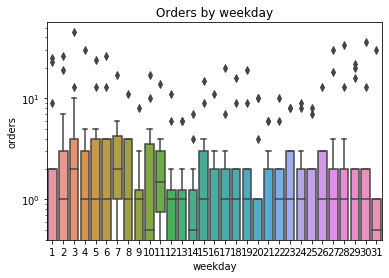

In [9]:
sns.boxplot(x='weekday', y='orders',  data=df).set_title('Orders by weekday')
plt.yscale('log')

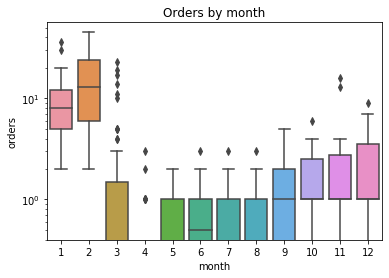

In [10]:
sns.boxplot(x='month', y='orders',  data=df).set_title('Orders by month')
plt.yscale('log')

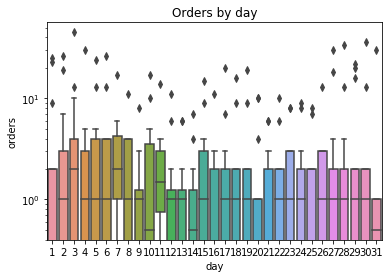

In [11]:
sns.boxplot(x='day', y='orders',  data=df).set_title('Orders by day')
plt.yscale('log')

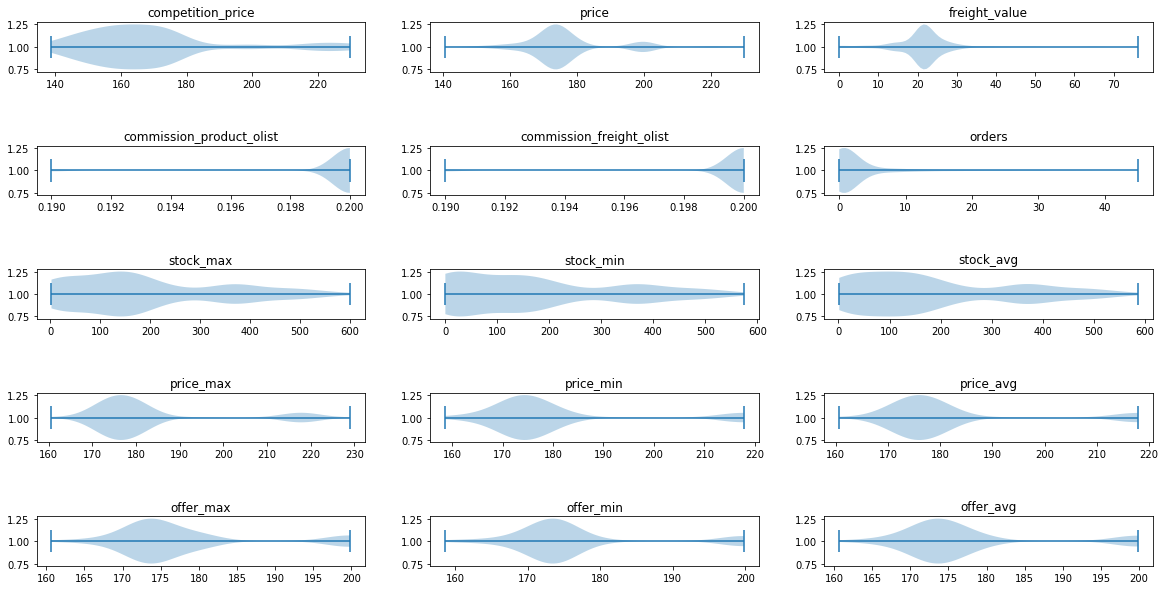

In [12]:
fig, axs = plt.subplots(5,3, figsize=(20, 10))
fig.subplots_adjust(hspace =1.5, wspace=0.2)
axs = axs.ravel()
for i in range(len(df_values.columns)):
    axs[i].violinplot(df_values.iloc[:,i], vert=False)
    axs[i].set_title(df_values.columns[i])

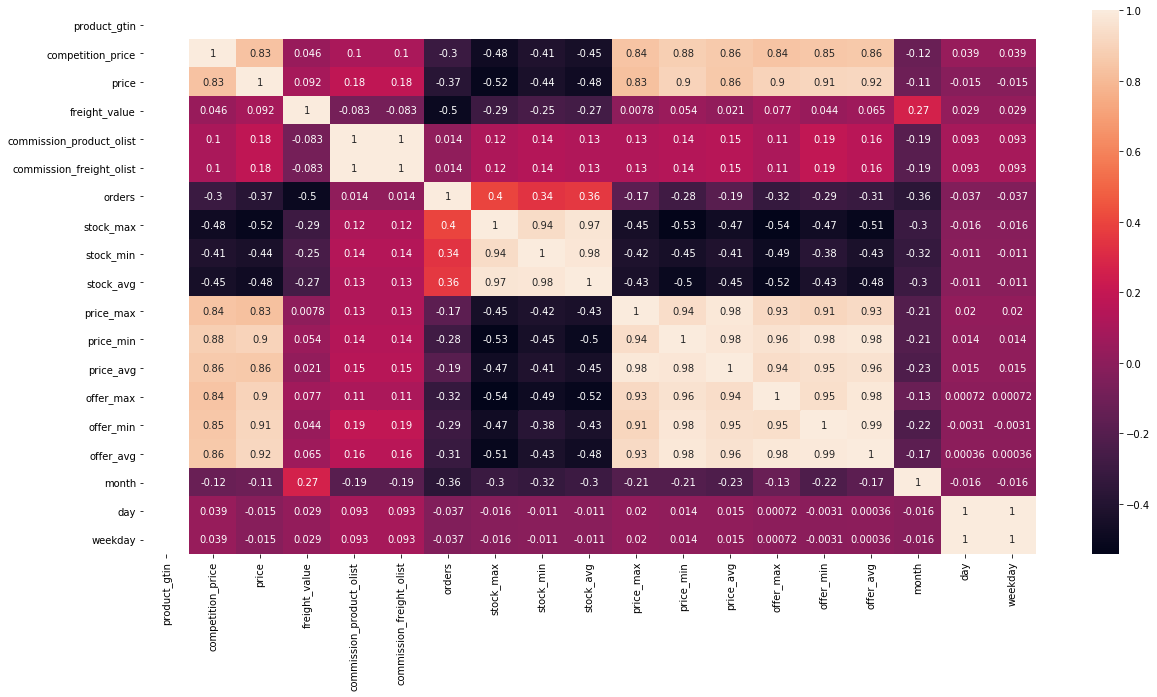

In [13]:
fig, ax = plt.subplots(figsize=(20,10))  
sns.heatmap(df.corr(), annot = True, ax = ax)

convert categorical to dummies

In [14]:
vars_cat = ['weekday', 'month', 'day']

df_cat_dummy = pd.get_dummies(df, columns = vars_cat, drop_first=True)
df_cat_dummy.head()

,date,product_gtin,competition_price,price,freight_value,commission_product_olist,commission_freight_olist,orders,product_type,product_type_group,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
47890,2019-03-15,7908243600137,217.8,199.8,21.5675,0.2,0.2,0.0,Kit para cabelo,beleza_saude,...,0,0,0,0,0,0,0,0,0,0
47891,2019-03-16,7908243600137,217.8,199.8,21.5675,0.2,0.2,0.0,Kit para cabelo,beleza_saude,...,0,0,0,0,0,0,0,0,0,0
47892,2019-03-17,7908243600137,217.8,199.8,21.5675,0.2,0.2,0.0,Kit para cabelo,beleza_saude,...,0,0,0,0,0,0,0,0,0,0
47893,2019-03-18,7908243600137,217.8,199.8,21.5675,0.2,0.2,0.0,Kit para cabelo,beleza_saude,...,0,0,0,0,0,0,0,0,0,0
47894,2019-03-19,7908243600137,217.8,199.8,21.5675,0.2,0.2,0.0,Kit para cabelo,beleza_saude,...,0,0,0,0,0,0,0,0,0,0


Lets make some regression tests and otimization. Our procedure: run a linear regression model with all variables avaiable. Then find the variables with p-value > 0.05, drop them, and re-run the model. This procedure will be make in loop untill remains only variables with p-value <0.05.

In [15]:
#for time-series it's not a good idea subset train and test datasets randonly, because time is a important feature.
#n_test = number os rows used in test dataset.
n_test = 60                
n_data = len(df_cat_dummy)
n_train = n_data - n_test

train = df_cat_dummy.iloc[0:n_train, :]
test  = df_cat_dummy.iloc[n_train:n_data, :]

In [16]:
list_var = df_cat_dummy.columns
print(list_var)

Index(['date', 'product_gtin', 'competition_price', 'price', 'freight_value',
       'commission_product_olist', 'commission_freight_olist', 'orders',
       'product_type', 'product_type_group', 'stock_max', 'stock_min',
       'stock_avg', 'price_max', 'price_min', 'price_avg', 'offer_max',
       'offer_min', 'offer_avg', 'name', 'description', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weekday_7',
       'weekday_8', 'weekday_9', 'weekday_10', 'weekday_11', 'weekday_12',
       'weekday_13', 'weekday_14', 'weekday_15', 'weekday_16', 'weekday_17',
       'weekday_18', 'weekday_19', 'weekday_20', 'weekday_21', 'weekday_22',
       'weekday_23', 'weekday_24', 'weekday_25', 'weekday_26', 'weekday_27',
       'weekday_28', 'weekday_29', 'weekday_30', 'weekday_31', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'day_2', 'day_3',
       'day_4', 'day_5', 'day_6', 'day_7

Let's run our regression without stock, price and offer avg, min and max....there's a lot of multicolinearity there. How deal with offer? Should we drop it? The question is, to forecast the number of orders we need input independent variables...do we have it?

First we set a function to  calculate MAPE (to evaluate the output of our models)

In [17]:
def MAPE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [18]:
#vars we dont run in the regression.
var_drop = ['date', 'product_gtin','product_type', 'product_type_group', 'orders','stock_max', 'stock_min',
            'stock_avg', 'price_max', 'price_min', 'price_avg', 'offer_max','offer_min', 'offer_avg', 'commission_product_olist',
            'commission_freight_olist']

y_df = pd.DataFrame(list_var)
y_df = y_df[~y_df[0].isin(var_drop)]


#input p-value threshold
threshold = 0.05

#set y variables
y = y_df[0]

#set X variable - manually, but dont change.
X = 'orders ~ '

#set initial parameters for record the results
nPar_i = len(y) #number of parameter at the beggining
nPar_f = 0 #number of parameters after the selection
model_form = []
model_nfeat = []
model_aic = []
model_r2 = []
model_MAPE = []

while nPar_f < nPar_i:
    #load the formula
    nPar_i = len(y) #number of parameters before the feature selection
    yform = ' + '.join(y)
    formula = X + yform
    #run the model
    model = smf.ols(formula=formula, data=train).fit()
    predictions = model.predict(test)
    #feed model output in lists
    model_form.append(formula) #formula used
    model_aic.append(model.aic) #aic
    model_r2.append(model.rsquared) #r2
    model_nfeat.append(len(model.params)) 
    model_MAPE.append(MAPE(test['orders'], predictions))
    #feed a dataframe with features of formula and p-values. drop the intercept, reset index, build a column abs(p-value) and filter rows with abs_p-value < threshold
    params = pd.DataFrame(model.pvalues)
    params = params.drop(['Intercept']).rename(columns = {0: 'p-value'}).reset_index()
    params['abs_p-value'] = abs(params['p-value'])
    y = params['index'][params['abs_p-value'] <= threshold]
    nPar_f = len(y) #number of parameters after feature selection



In [19]:
#print the dataframe with final analysis.
pd.DataFrame({'formula': model_form, 'aic': model_aic, 'r2' : model_r2, 'nfeat' : model_nfeat, 'mape': model_MAPE})

,formula,aic,r2,nfeat,mape
0,orders ~ competition_price + price + freight_v...,1631.731895,0.762725,75,inf
1,orders ~ price + freight_value + weekday_3 + w...,1589.489112,0.754065,22,inf


In [20]:
#o mape nao ta calculando direito. nao to conseguindo plotar o test.orders x prediction
trace0 = go.Scatter(x=test.date,
                   y=test.orders, mode='lines', name='orders')

trace1 = go.Scatter(x=df.date,
                    y=predictions, mode='markers', name='competition price')

iplot([trace0])

Transforming float variables by boxcox criterium. The interpretation indexes was found here: https://www.statisticshowto.com/box-cox-transformation/

In [21]:
#creating a function to check if data is float and if it is, convert it by boxcox criterium. I added 0.0001 to allow the log calculations.

def transf_boxcox(data):
    temp, fitted_lambda = stats.boxcox(data+0.0001)
    if fitted_lambda < -2.7:
        return (1/(data+0.0001)**3)
    elif fitted_lambda <-1.7:
        return (1/(data+0.0001)**2)
    elif fitted_lambda <-0.7:
        return (1/(data+0.0001))
    elif fitted_lambda <-0.3:
        return (1/(data+0.0001)**0.5)
    elif fitted_lambda <0.3:
        return np.log(data+0.0001)
    elif fitted_lambda <0.7:
        return ((data+0.0001)**0.5)
    elif fitted_lambda <1.3:
        return ((data+0.0001))
    elif fitted_lambda <2.3:
        return ((data+0.0001)**2)
    elif fitted_lambda <3.3:
        return ((data+0.0001)**3)
    else:
        return ((data+0.0001))

In [22]:
df_cat_dummy_t = df_cat_dummy.copy()
for col in df_cat_dummy_t.columns:
    if df_cat_dummy_t[col].dtypes == "float":
        df_cat_dummy_t[col] = transf_boxcox(df_cat_dummy_t[col])

In [23]:
df_cat_dummy_t

,date,product_gtin,competition_price,price,freight_value,commission_product_olist,commission_freight_olist,orders,product_type,product_type_group,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
47890,2019-03-15,7908243600137,9.678895e-08,1.253756e-07,21.5676,0.2001,0.2001,-9.21034,Kit para cabelo,beleza_saude,...,0,0,0,0,0,0,0,0,0,0
47891,2019-03-16,7908243600137,9.678895e-08,1.253756e-07,21.5676,0.2001,0.2001,-9.21034,Kit para cabelo,beleza_saude,...,0,0,0,0,0,0,0,0,0,0
47892,2019-03-17,7908243600137,9.678895e-08,1.253756e-07,21.5676,0.2001,0.2001,-9.21034,Kit para cabelo,beleza_saude,...,0,0,0,0,0,0,0,0,0,0
47893,2019-03-18,7908243600137,9.678895e-08,1.253756e-07,21.5676,0.2001,0.2001,-9.21034,Kit para cabelo,beleza_saude,...,0,0,0,0,0,0,0,0,0,0
47894,2019-03-19,7908243600137,9.678895e-08,1.253756e-07,21.5676,0.2001,0.2001,-9.21034,Kit para cabelo,beleza_saude,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48273,2020-04-01,7908243600137,2.378420e-07,1.941432e-07,21.5676,0.2001,0.2001,-9.21034,Kit para cabelo,beleza_saude,...,0,0,0,0,0,0,0,0,0,0
48274,2020-04-02,7908243600137,2.378420e-07,1.941432e-07,21.5676,0.2001,0.2001,-9.21034,Kit para cabelo,beleza_saude,...,0,0,0,0,0,0,0,0,0,0
48275,2020-04-03,7908243600137,2.378420e-07,1.941432e-07,21.5676,0.2001,0.2001,-9.21034,Kit para cabelo,beleza_saude,...,0,0,0,0,0,0,0,0,0,0
48276,2020-04-04,7908243600137,2.378420e-07,1.941432e-07,21.5676,0.2001,0.2001,-9.21034,Kit para cabelo,beleza_saude,...,0,0,0,0,0,0,0,0,0,0


In [24]:
train = df_cat_dummy_t.iloc[0:n_train, :]
test  = df_cat_dummy_t.iloc[n_train:n_data, :]

In [25]:
#vars we dont run in the regression.
var_drop = ['date', 'product_gtin','product_type', 'product_type_group', 'orders','stock_max', 'stock_min',
            'stock_avg', 'price_max', 'price_min', 'price_avg', 'offer_max','offer_min', 'offer_avg', 'commission_product_olist',
            'commission_freight_olist']

y_df = pd.DataFrame(list_var)
y_df = y_df[~y_df[0].isin(var_drop)]


#input p-value threshold
threshold = 0.05

#set y variables
y = y_df[0]

#set X variable - manually, but dont change.
X = 'orders ~ '

#set the dataset
dataset = 'train'

#set initial parameters for record the results
nPar_i = len(y) #number of parameter at the beggining
nPar_f = 0 #number of parameters after the selection
model_form = []
model_nfeat = []
model_aic = []
model_r2 = []
model_MAPE = []

while nPar_f < nPar_i:
    #load the formula
    nPar_i = len(y) #number of parameters before the feature selection
    yform = ' + '.join(y)
    formula = X + yform
    #run the model
    model = smf.ols(formula=formula, data=train).fit()
    predictions = model.predict(test)
    #feed model output in lists
    model_form.append(formula) #formula used
    model_aic.append(model.aic) #aic
    model_r2.append(model.rsquared) #r2
    model_nfeat.append(len(model.params)) 
    model_MAPE.append(MAPE(test['orders'], predictions))
    #feed a dataframe with features of formula and p-values. drop the intercept, reset index, build a column abs(p-value) and filter rows with abs_p-value < threshold
    params = pd.DataFrame(model.pvalues)
    params = params.drop(['Intercept']).rename(columns = {0: 'p-value'}).reset_index()
    params['abs_p-value'] = abs(params['p-value'])
    y = params['index'][params['abs_p-value'] <= threshold]
    nPar_f = len(y) #number of parameters after feature selection



In [26]:
#print the dataframe with final analysis.
pd.DataFrame({'formula': model_form, 'aic': model_aic, 'r2' : model_r2, 'nfeat' : model_nfeat, 'mape': model_MAPE})

,formula,aic,r2,nfeat,mape
0,orders ~ competition_price + price + freight_v...,1914.470748,0.376658,75,29936.520046
1,orders ~ price + freight_value + weekday_7 + m...,1876.338139,0.329609,15,23753.241802
